In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [33]:
def turn_right(direction):
    orth_direction = np.array([0,0,-1.])
    direction = np.array([*direction,0])
    right_direction = np.cross(orth_direction, direction)
    return right_direction[:-1]

def turn_left(direction):
    orth_direction = np.array([0,0,1.])
    direction = np.array([*direction,0])
    right_direction = np.cross(orth_direction, direction)
    return right_direction[:-1]

def move_straight(direction, origin, length): 
    return length * direction + origin

In [99]:
def koch_snowflake(depth, length=1.):    
    def kernel_forward(depth, length, direction, vertices):
        if depth == 0:
            vertices.append(move_straight(direction, vertices[-1], length))
        else:
            for _ in range(4):
                kernel_forward(depth-1, length/4, direction, vertices)
                direction = turn_right(direction)
                kernel_forward(depth-1, length/4, direction, vertices)
                direction = turn_left(direction)                
                kernel_forward(depth-1, length/4, direction, vertices)
                direction = turn_left(direction)                
                kernel_forward(depth-1, length/4, direction, vertices)
                direction = turn_right(direction)
                kernel_forward(depth-1, length/4, direction, vertices)
                direction = turn_left(direction)
                
    origin = np.array([1,0.])
    vertices = [origin]
    direction = np.array([0., 1.])
    kernel_forward(depth, length, direction, vertices);
    return np.array(vertices)
            
            
            
        

In [106]:
s = koch_snowflake(1)

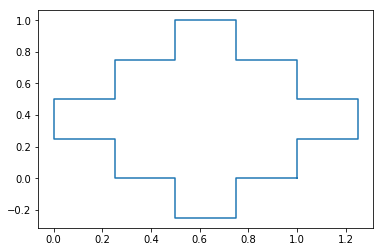

In [107]:
plt.plot(s[:,0], s[:,1])